In [1]:
# !pip install graphviz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from scipy.stats import chi2_contingency
from sklearn import tree
import numpy as np
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, confusion_matrix
from graphviz import Source
import xgboost as xgb
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn import svm
from sklearn.svm import SVC
%matplotlib inline

##### Set the property to display all columns of dataframe instead of summary view

In [2]:
pd.set_option("display.max_columns" , None)

##### Create a template to customize the appearance of plotly plots using a layout of font family of "Franklin Gothic" and a font size of 12

In [3]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

##### Load the training and testing dataset into dataframe

In [4]:
#load the train and test dataset into dataframe
df_train = pd.read_csv("Training.csv")
df_test = pd.read_csv('Testing.csv')
df_train.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

##### Check the size of training and test dataset

In [5]:
print(df_train.shape)
print(df_test.shape)

(4920, 134)
(42, 133)


##### Check the number count of each disease in test data

In [6]:
df_test.prognosis.value_counts()

Fungal infection                           2
Hepatitis C                                1
Hepatitis E                                1
Alcoholic hepatitis                        1
Tuberculosis                               1
Common Cold                                1
Pneumonia                                  1
Dimorphic hemmorhoids(piles)               1
Heart attack                               1
Varicose veins                             1
Hypothyroidism                             1
Hyperthyroidism                            1
Hypoglycemia                               1
Osteoarthristis                            1
Arthritis                                  1
(vertigo) Paroymsal  Positional Vertigo    1
Acne                                       1
Urinary tract infection                    1
Psoriasis                                  1
Hepatitis D                                1
Hepatitis B                                1
Allergy                                    1
hepatitis 

## Data Cleaning/Preprocessing

##### Remove unwanted imported column

In [7]:
del df_train['Unnamed: 133']

##### Concatenate the testing and training data

In [8]:
data = pd.concat([df_train, df_test])

##### Check the size of the dataset

In [9]:
data.shape

(4962, 133)

###### Check for distinct values of each column in the dataset

In [10]:
data.apply(pd.Series.value_counts)

itching  skin_rash  \
0                                         4277.0     4168.0   
1                                          685.0      794.0   
(vertigo) Paroymsal  Positional Vertigo      NaN        NaN   
AIDS                                         NaN        NaN   
Acne                                         NaN        NaN   
Alcoholic hepatitis                          NaN        NaN   
Allergy                                      NaN        NaN   
Arthritis                                    NaN        NaN   
Bronchial Asthma                             NaN        NaN   
Cervical spondylosis                         NaN        NaN   
Chicken pox                                  NaN        NaN   
Chronic cholestasis                          NaN        NaN   
Common Cold                                  NaN        NaN   
Dengue                                       NaN        NaN   
Diabetes                                     NaN        NaN   
Dimorphic hemmorhoids(piles)                 NaN        NaN   
Drug Reaction                                NaN        NaN   
Fungal infection                             NaN        NaN   
GERD                                         NaN        NaN   
Gastroenteritis                              NaN        NaN   
Heart attack                                 NaN        NaN   
Hepatitis B                                  NaN        NaN   
Hepatitis C                                  NaN        NaN   
Hepatitis D                                  NaN        NaN   
Hepatitis E                                  NaN        NaN   
Hypertension                                 NaN        NaN   
Hyperthyroidism                              NaN        NaN   
Hypoglycemia                                 NaN        NaN   
Hypothyroidism                               NaN        NaN   
Impetigo                                     NaN        NaN   
Jaundice                                     NaN        NaN   
Malaria                                      NaN        NaN   
Migraine                                     NaN        NaN   
Osteoarthristis                              NaN        NaN   
Paralysis (brain hemorrhage)                 NaN        NaN   
Peptic ulcer diseae                          NaN        NaN   
Pneumonia                                    NaN        NaN   
Psoriasis                                    NaN        NaN   
Tuberculosis                                 NaN        NaN   
Typhoid                                      NaN        NaN   
Urinary tract infection                      NaN        NaN   
Varicose veins                               NaN        NaN   
hepatitis A                                  NaN        NaN   

                                         nodal_skin_eruptions  \
0                                                      4853.0   
1                                                       109.0   
(vertigo) Paroymsal  Positional Vertigo                   NaN   
AIDS                                                      NaN   
Acne                                                      NaN   
Alcoholic hepatitis                                       NaN   
Allergy                                                   NaN   
Arthritis                                                 NaN   
Bronchial Asthma                                          NaN   
Cervical spondylosis                                      NaN   
Chicken pox                                               NaN   
Chronic cholestasis                                       NaN   
Common Cold                                               NaN   
Dengue                                                    NaN   
Diabetes                                                  NaN   
Dimorphic hemmorhoids(piles)                              NaN   
Drug Reaction                                             NaN   
Fungal infection                                          NaN   
GERD                             

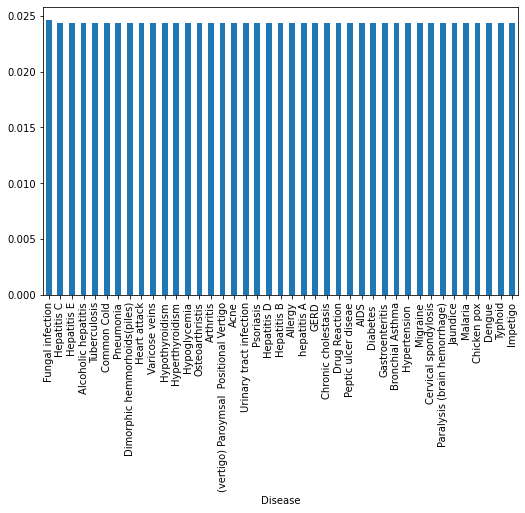

In [11]:
data['prognosis'].value_counts(normalize = True).plot.bar()
plt.xlabel('Disease')
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)
plt.show()

##### From the above we can note that there is not one or some highly common diagnosed disease as all of them are of same percentage

##### Check for null values

In [12]:
# using iterrows to iterate over all the columns and display to avoid middle columns being left out as summary display
nulls = data.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, ' -- ', row[0])

itching  --  0
skin_rash  --  0
nodal_skin_eruptions  --  0
continuous_sneezing  --  0
shivering  --  0
chills  --  0
joint_pain  --  0
stomach_pain  --  0
acidity  --  0
ulcers_on_tongue  --  0
muscle_wasting  --  0
vomiting  --  0
burning_micturition  --  0
spotting_ urination  --  0
fatigue  --  0
weight_gain  --  0
anxiety  --  0
cold_hands_and_feets  --  0
mood_swings  --  0
weight_loss  --  0
restlessness  --  0
lethargy  --  0
patches_in_throat  --  0
irregular_sugar_level  --  0
cough  --  0
high_fever  --  0
sunken_eyes  --  0
breathlessness  --  0
sweating  --  0
dehydration  --  0
indigestion  --  0
headache  --  0
yellowish_skin  --  0
dark_urine  --  0
nausea  --  0
loss_of_appetite  --  0
pain_behind_the_eyes  --  0
back_pain  --  0
constipation  --  0
abdominal_pain  --  0
diarrhoea  --  0
mild_fever  --  0
yellow_urine  --  0
yellowing_of_eyes  --  0
acute_liver_failure  --  0
fluid_overload  --  0
swelling_of_stomach  --  0
swelled_lymph_nodes  --  0
malaise  --  0
blu

##### Get all the unique values of target variable

In [13]:
data.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

##### Checking the associations between different symptoms using correlation technique

In [14]:
cr = data.corr()

In [15]:
cr_arr = np.array(cr)

<AxesSubplot:>

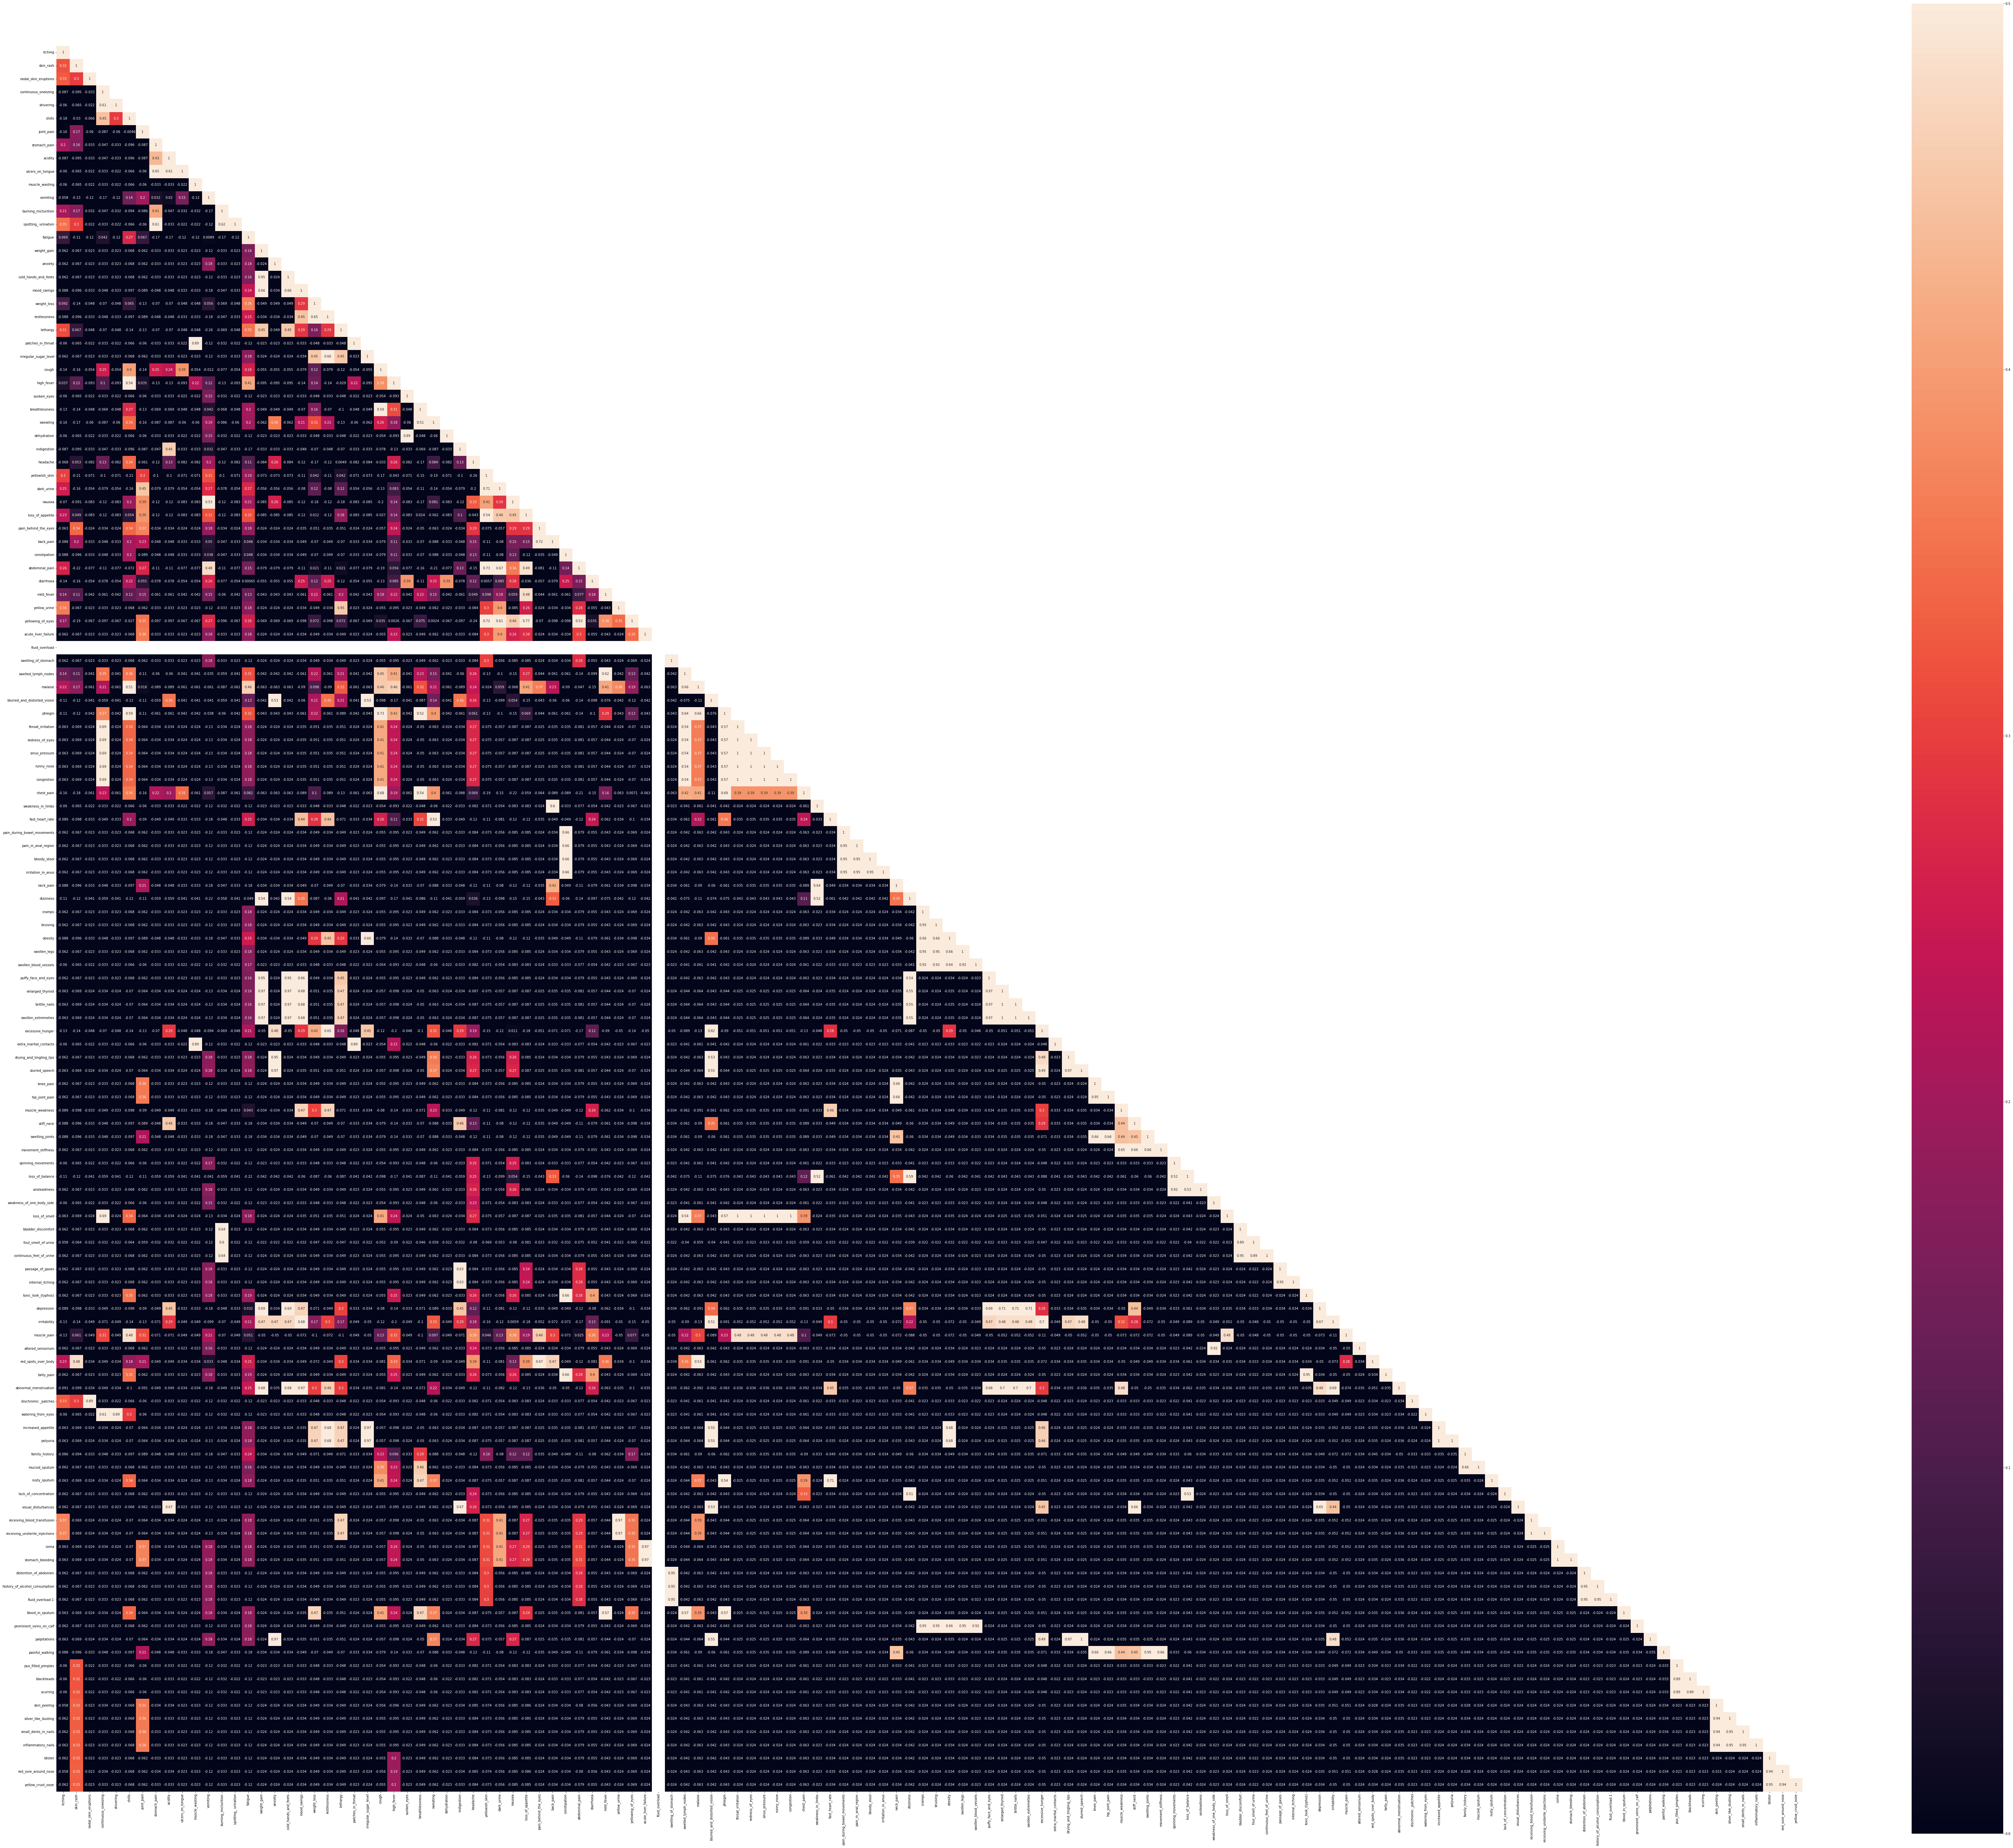

In [16]:
cr_arr[np.tril_indices_from(cr_arr)] = False
plt.subplots_adjust(left = 0.5, right = 16 , top = 20, bottom = 0.5)
sns.heatmap(cr, mask=cr_arr, vmin=0, vmax=0.5, square=True, annot=True)

##### Took two high correlation variables from the heatmap and analyzing if it is satisfying null hypothesis or alternate hypothesis

The pd.crosstab() function is used to create a contingency table, which is a table that displays the frequency distribution of two or more categorical variables. 

In [17]:
pd.crosstab(data['history_of_alcohol_consumption'],data['distention_of_abdomen'])

distention_of_abdomen              0    1
history_of_alcohol_consumption           
0                               4841    6
1                                  6  109

##### As p value is  0.0  which is less than 0.05 then they are actually different from each other which satisfy the alternate hypothesis using Chi Squared analysis

The chi-squared (χ²) test of independence is a statistical test used to determine whether there is a significant association between two categorical variables. The test statistic is then calculated as the sum of the squared differences between the observed and expected frequencies, divided by the expected frequencies.

If the p-value is below a specified significance level (such as 0.05), then it is concluded that there is significant evidence of a relationship between the two categorical variables. Conversely, if the p-value is above the significance level, then there is not enough evidence to reject the null hypothesis of independence between the two variables.

In [18]:
chi2_contingency(pd.crosstab(data['history_of_alcohol_consumption'],data['distention_of_abdomen']))

(4404.383098384241,
 0.0,
 1,
 array([[4.73466526e+03, 1.12334744e+02],
        [1.12334744e+02, 2.66525595e+00]]))

##### Create multiple subplots in a single figure object. The trace that is being added is a horizontal bar chart to specific subplot in Plotly Figure object

In [19]:
def plot(start, end):
    sub_titles = ['{}'.format(i) for i in data.columns[start:end]]
    #  there are 4 rows and 4 columns, so the resulting Figure object will have 16 subplots in total.
    fig = make_subplots(rows=4, cols=4, subplot_titles=sub_titles)
    row=0
    c=[1,2,3,4]*4

    for i, col in enumerate(data.columns[start:end]):
        if i%4==0:
            row+=1
        df = pd.DataFrame(data.groupby(["prognosis"], as_index=False)[col].sum()).rename(columns={col: "count"})
        
        # The row argument specifies the row number of the subplot, and the col argument specifies the column number.
        fig.add_trace(go.Bar(x=df["count"], y=df["prognosis"], orientation="h", width=0.3), row=row, col=c[i])
    fig.update_layout(template=temp, title="Symptoms", autosize=False, height=4000, width=1000, showlegend=False)
    fig.show()

###### Since there are 132 feature splitting the plots in multiple of 16 arranged in 4x4 grid and each subplot with separate title. 

In [20]:
start = 0
for i in range(16, 128):
    if i%16==0:
        plot(start, i)
        start += 16

##### The above figure gives a list of all the symptoms and a person having those symptoms could possibly lead to OR could already be suffering from one of the possible diseases.

### Convert categorical variables to numerical variables

LabelEncoder tranforms categorical data into numerical labels, which then can be used as input to machine learning algorithms, as these techniques cannot work directly with categorical data.

##### Create an instance of the LabelEncoder

In [21]:
label_encoder = LabelEncoder()

##### Fit the encoder to the target variable

In [22]:
label_encoder.fit(data['prognosis'])

LabelEncoder()

##### Fit the encoder to the class column and transform it
Now a new column 'Prognosis' which is the transformed version of original 'prognosis' column is added to dataframe

In [23]:
data['Prognosis'] = label_encoder.fit_transform(data['prognosis'])
print(data.shape)

(4962, 134)


##### Remove the original categorical datatype target variable

In [24]:
data.drop('prognosis',axis=1,inplace=True)
# df_test.drop('prognosis',axis=1,inplace=True)

##### Verify that the column has been removed 

In [25]:
print(data.shape)
# print(df_test.shape)

(4962, 133)


##### Check the dataframe now with the transformed target variable

In [26]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

##### Get the dependent and independent variables/features separately 

In [27]:
x, y = data.iloc[:,:-1], data.iloc[:,-1]

##### Spliting the dataset into training set and test set with 70% training and 30% test 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

## Feature Selection
To eliminate irrelevant or comparatively less important features from the dataset Lasso regularization is applied. 

The penalty term in the Lasso technique is proportional to the absolute value of the coefficient estimates. As a result, some of the coefficients will be exactly zero when the penalty term is sufficiently large. This means that the corresponding predictors have no effect on the outcome and can be dropped from the model.

Here Ridge regularization is not opted for, as that technique will never make coefficients to be exactly zero, however will assign it very close to zero. Thus the features selection based on coefficient will become more tedious. 

##### Fit a Lasso regression model to the training data

In [29]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

##### Get the coefficients of the model and identify the features with non-zero coefficients

In [30]:
selected_features = lasso.coef_ != 0

Some of the coefficients will be exactly zero when the penalty term is sufficiently large. This means that the corresponding predictors have no effect on the outcome and can be dropped from the model.

##### Retrieve the features and data

In [31]:
features = x_train.columns[selected_features]  
x_train_select = x_train.loc[:, features]
x_test_select = x_test.loc[:, features]

There is no need to scale the data or apply any scaling techniques, since primary reason for scaling is to handle outliers. Since the data is all binary, it can be confirmed that no outliers exists in the dataset.

##### Print the selected data frame

In [32]:
print(features)

Index(['continuous_sneezing', 'chills', 'joint_pain', 'muscle_wasting',
       'fatigue', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'sweating', 'indigestion', 'headache',
       'dark_urine', 'back_pain', 'diarrhoea', 'mild_fever',
       'swelling_of_stomach', 'chest_pain', 'cramps', 'bruising',
       'swollen_legs', 'extra_marital_contacts', 'knee_pain', 'hip_joint_pain',
       'muscle_weakness', 'spinning_movements', 'unsteadiness',
       'weakness_of_one_body_side', 'bladder_discomfort',
       'foul_smell_of urine', 'continuous_feel_of_urine', 'passage_of_gases',
       'internal_itching', 'toxic_look_(typhos)', 'depression', 'irritability',
       'altered_sensorium', 'red_spots_over_body', 'belly_pain',
       'increased_appetite', 'polyuria', 'mucoid_sputum', 'rusty_sputum',
       'lack_of_concentration', 'distention_of_abdomen',
       'history_of_alcohol_consumption', 'fluid_overload.1',
       'prominent_veins_on_calf', 'pus_filled_pimples', 

##### Check the count of relevant or important features selected and how the dataframe looks

In [33]:
print(x_train_select.shape)
print(x_test_select.shape)

(3473, 58)
(1489, 58)


In [34]:
x_train_select.head()

continuous_sneezing  chills  joint_pain  muscle_wasting  fatigue  \
4686                    0       0           0               0        0   
3176                    0       0           1               0        0   
1650                    1       1           0               0        0   
3734                    0       0           0               0        0   
112                     0       0           0               0        0   

      weight_loss  restlessness  lethargy  patches_in_throat  sweating  \
4686            0             0         0                  0         0   
3176            0             0         0                  0         0   
1650            0             0         0                  0         0   
3734            0             0         0                  0         0   
112             0             0         0                  0         0   

      indigestion  headache  dark_urine  back_pain  diarrhoea  mild_fever  \
4686            0         0           0          1          0           0   
3176            0         0           1          0          1           1   
1650            0         0           0          0          0           0   
3734            0         0           0          0          0           0   
112             0         1           0          0          0           0   

      swelling_of_stomach  chest_pain  cramps  bruising  swollen_legs  \
4686                    0           0       0         0             0   
3176                    0           0       0         0             0   
1650                    0           0       0         0             0   
3734                    0           0       0         0             0   
112                     0           0       0         0             0   

      extra_marital_contacts  knee_pain  hip_joint_pain  muscle_weakness  \
4686                       0          0               0                0   
3176                       0          0               0                0   
1650                       0          0               0                0   
3734                       0          0               0                0   
112                        0          0               0                0   

      spinning_movements  unsteadiness  weakness_of_one_body_side  \
4686                   0             0                          0   
3176                   0             0                          0   
1650                   0             0                          0   
3734                   0             0                          0   
112                    0             0                          0   

      bladder_discomfort  foul_smell_of urine  continuous_feel_of_urine  \
4686                   0                    0                         0   
3176                   0                    0                         0   
1650                   0                    0                         0   
3734                   0                    0                         0   
112                    0                    0                         0   

      passage_of_gases  internal_itching  toxic_look_(typhos)  depression  \
4686                 0                 0                    0           0   
3176                 0                 0                    0           0   
1650                 0                 0                    0           0   
3734                 0                 0                    0           0   
112                  0                 0                    0           1   

      irritability  altered_sensorium  red_spots_over_body  belly_pain  \
4686             0                  0                    0           0   
3176             0                  0                    0           0   
1650             0                  0                    0           0   
3734             0                  0                    0           0   
112              1                  0                    0

## Machine Learning Models

When building a machine learning model for classification, it is often necessary to choose the best combination of hyperparameters to achieve optimal performance. Hyperparameters are parameters that are set before the learning process begins, such as the learning rate, regularization parameter, or the number of trees in a random forest classifier. The choice of hyperparameters can greatly affect the performance of the model, and tuning these hyperparameters is an important step in the machine learning workflow. 

There are several methods for hyperparameter tuning, including grid search, random search, and Bayesian optimization.

### Random Forest Classifier

##### Define the parameter grid to search over

A parameter grid is a set of hyperparameters and their corresponding values that are chosen to be tested during the model tuning process. The grid is usually defined by specifying a range of possible values for each hyperparameter, and then the model is trained and evaluated for each possible combination of hyperparameters in the grid. Grid search is one of the techniques for hyperparameter tuning.

In [35]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

##### Initialize the random forest classifier

In [36]:
rf = RandomForestClassifier()

##### Define the randomized search object

RandomizedSearchCV is a variation of grid search technique, which is more efficient because it randomly selects hyperparameters rather than trying all possible combinations. Also, RandomizedSearchCV can prevent overfitting because it performs cross-validation during the search process, which helps to ensure that the hyperparameters generalize well to new data.

In [37]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=5)

##### Fit the randomized search object to the training data

In [68]:
random_search.fit(x_train_select, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 500, 1000]})

##### Evaluate the best model on the testing data and get the accuracy

In [69]:
y_pred = random_search.best_estimator_.predict(x_test_select)
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy_rfc * 100))

Accuracy: 88.85%


##### Print the best hyperparameters found

In [70]:
print("Best hyperparameters combination: ", random_search.best_params_)

Best hyperparameters combination:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}


##### Create a feature importance plot
Get the best features determined by random forest technique 

In [71]:
importances = random_search.best_estimator_.feature_importances_

Compute the standard deviation or the measure of spread for the distribution along the first axis or row

In [72]:
std = np.std([tree.feature_importances_ for tree in random_search.best_estimator_.estimators_], axis=0)

Sort the list of important features in descending order

In [73]:
indices = np.argsort(importances)[::-1]

Plot the bar chart

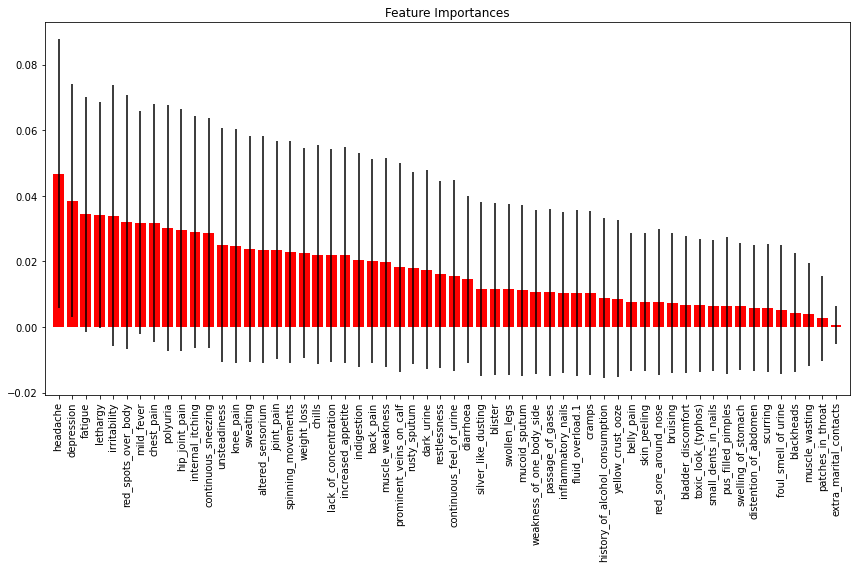

In [74]:
plt.figure(figsize = (12, 8))
plt.title("Feature Importances")
plt.bar(range(x_train_select.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train_select.shape[1]), x_train_select.columns[indices], rotation=90)
plt.xlim([-1, x_train_select.shape[1]])
plt.tight_layout()
plt.show()

##### Confusion Matrix Heatmap to get the ratio between True Positive and False Positive

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



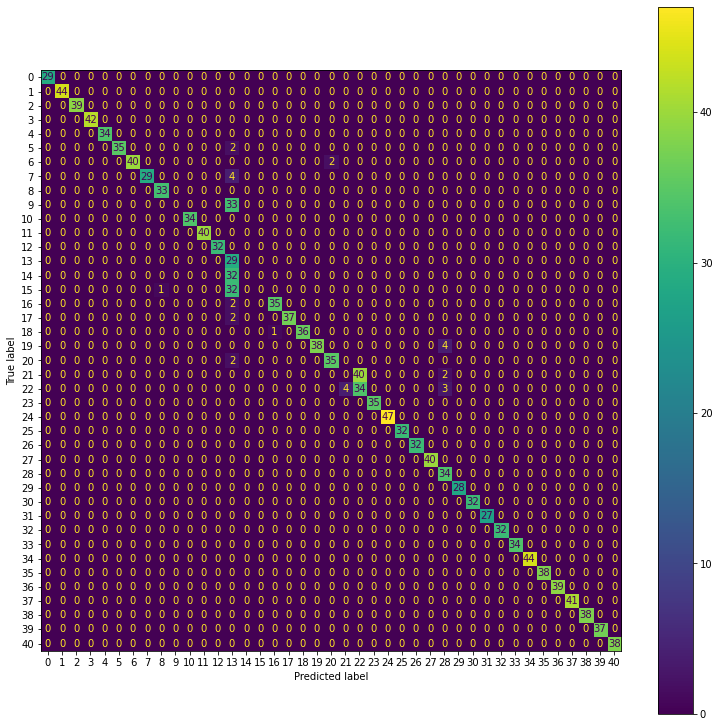

In [75]:
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(random_search.best_estimator_, x_test_select, y_test, ax=ax)

##### Print the classification report

In [76]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      0.95      0.97        37
           6       1.00      0.95      0.98        42
           7       1.00      0.88      0.94        33
           8       0.97      1.00      0.99        33
           9       0.00      0.00      0.00        33
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        32
          13       0.21      1.00      0.35        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        33
          16       0.97      0.95      0.96        37
    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### Predict the probabilities for each sample

In [77]:
y_pred_prob = random_search.predict_proba(x_test_select)
print(y_pred_prob.shape)

(1489, 41)


##### Plot ROC(Receiver Operating Characteristic) curve to validate the performance of model 

- its a graph to denote True Positive Rate v False Positive Rate
- y_test contains the true labels for each sample
- y_pred_prob contains the predicted probabilities for each sample
- where y_pred_prob is an array of size (n_samples, n_classes)
- n_classes is the number of classes, in this case 42

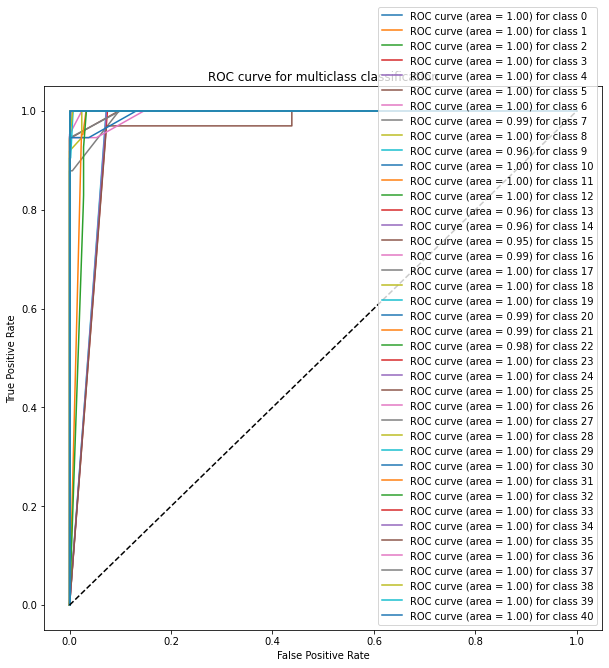

In [78]:
fpr = dict()                    # false positive rate
tpr = dict()                    # true positive rate
roc_auc = dict()

for i in range(41):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10,10))
for i in range(41):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

# Plot the random line
plt.plot([0, 1], [0, 1], 'k--')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass classification')
plt.legend(loc="lower right")
plt.show()

##### Plot AUC curve to validate the performance of model 

- y_test contains the true labels for each sample
- y_pred_prob contains the predicted probabilities for each sample
- where y_pred_prob is an array of size (n_samples, n_classes)
- n_classes is the number of classes, in this case 42

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2484\3546864179.py:20: DeprecationWarning:

scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead



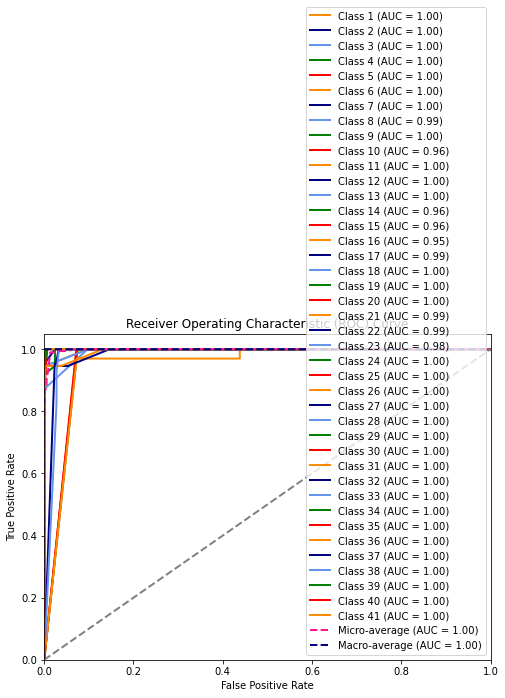

In [79]:
n_classes=41

# Binarize the true labels
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute the micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_pred_prob.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Compute the macro-average ROC curve and AUC
fpr_macro = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
tpr_macro = interp(fpr_macro, np.concatenate([fpr[i] for i in range(n_classes)]), np.concatenate([tpr[i] for i in range(n_classes)]))
roc_auc_macro = auc(fpr_macro, tpr_macro)

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['darkorange', 'navy', 'cornflowerblue', 'green', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i+1, roc_auc[i]))

# Plot the micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2, label='Micro-average (AUC = {0:0.2f})'.format(roc_auc_micro))

# Plot the macro-average ROC curve
plt.plot(fpr_macro, tpr_macro, color='navy', linestyle='--', lw=2, label='Macro-average (AUC = {0:0.2f})'.format(roc_auc_macro))

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier

Decision Tree algorithm works by creating a tree-like model of decisions and their possible consequences. It splits the data based on the values of specific features, chooses the most informative feature at each node, and uses this model to predict the classification of new data.

The decision tree starts at the top with a node called the "root node," which represents the entire dataset. From there, the algorithm splits the data into smaller groups based on the values of specific features. Each new group is represented by a new node, and the process is repeated until the algorithm reaches a "leaf node" for each possible outcome.

##### Determine a criteria to apply while training the model 

Define the methods to compute information gain and gini index values 

In [39]:
from collections import Counter

def entropy(y):
    n = len(y)
    frequency = Counter(y)
    entropy = 0
    for label in frequency:
        p = frequency[label] / n
        entropy -= p * np.log2(p)
    return entropy

def information_gain(X, y, feature_index):
    n = len(y)
    split_list = [X[i][feature_index] for i in range(n)]
    unique_splits = set(split_list)
    information_gain = entropy(y)
    for split in unique_splits:
        index_list = [i for i in range(n) if X[i][feature_index] == split]
        y_subset = [y[i] for i in index_list]
        p = len(y_subset) / n
        information_gain -= p * entropy(y_subset)
    return information_gain

def gini_index(y):
    n = len(y)
    frequency = Counter(y)
    gini = 1
    for label in frequency:
        p = frequency[label] / n
        gini -= p**2
    return gini


##### Iterate over each feature and calculate the information gain for each one of them. Output the best gain value and its respective feature

In [40]:
#assign the # of features we have in our dataset
n_features = 132

#initialize the best feature and gain to select as root node and start the split 
best_feature = None
best_Gain = 0

for feature_index in range(n_features):
    current_Gain = information_gain(x.values , y.values , feature_index)
    if current_Gain > best_Gain:
        best_feature = feature_index
        best_Gain = current_Gain

#this shows which feature will be considered for splitting 
print("Best feature index:", best_feature)   # in this case it's considering Age with index starting from 0
print("Information Gain:", best_Gain)
print("Gini index:", gini_index(y.values ))

Best feature index: 14
Information Gain: 0.8466540039565871
Gini index: 0.9756097164731677


##### Create the decision tree model using entropy calculated earlier

In [42]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train_select , y_train)

DecisionTreeClassifier(criterion='entropy')

##### Predict our target variable

In [43]:
y_pred_dt=dt.predict(x_test_select)

##### Compute the accuracy score

In [44]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Score: ", accuracy_dt)

Accuracy Score:  0.8885157824042982


##### Compute the classification report

In [45]:
cr = classification_report(y_test, y_pred_dt)
print("Classification Report: \n", cr)

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      0.95      0.97        37
           6       1.00      0.95      0.98        42
           7       1.00      0.88      0.94        33
           8       1.00      1.00      1.00        33
           9       0.00      0.00      0.00        33
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        32
          13       0.21      1.00      0.35        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        33
          16       0.97      0.95      0.96        37
  

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### Graphviz is an open-source graph visualization software package that allows you to create and visualize graphs and networks in a simple and flexible way. 

When you use export_graphviz, it generates a textual description of the decision tree in the Graphviz language. This language is a simple text format that describes how to draw graphs and is widely used in software engineering, network engineering, and other fields. The textual description produced by export_graphviz can then be visualized using Graphviz tools like dot.

In [46]:
export_graphviz( dt, out_file='./tree.dot', feature_names = x_train_select.columns)

In [47]:
graph = Source( export_graphviz( dt, out_file=None, feature_names = x_train_select.columns))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

###### Display the graph/tree as an image

In [48]:
from IPython.display import Image
Image(png_bytes)

##### Feature importance plot

In [93]:
importances = dt.feature_importances_

In [95]:
std = np.std([dt.feature_importances_ for tree in importances], axis=0)

In [96]:
indices = np.argsort(importances)[::-1]

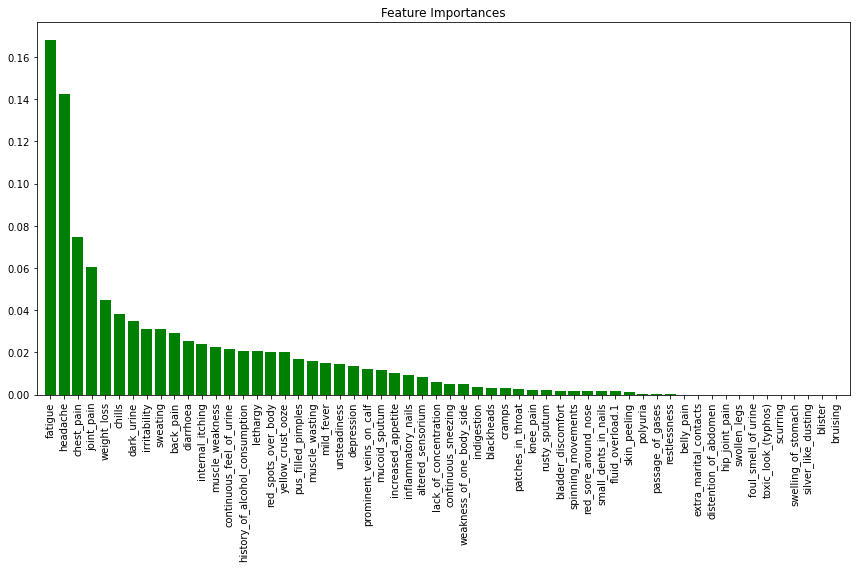

In [98]:
plt.figure(figsize = (12, 8))
plt.title("Feature Importances")
plt.bar(range(x_train_select.shape[1]), importances[indices], color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train_select.shape[1]), x_train_select.columns[indices], rotation=90)
plt.xlim([-1, x_train_select.shape[1]])
plt.tight_layout()
plt.show()

### XGBoost Classifier

eXtreme Gradient Boosting is an ensemble learning method that combines multiple decision tree models to make predictions. The XGBoost algorithm works by iteratively building decision trees in a way that minimizes the error of the combined model. In each iteration, a new decision tree is added to the model to correct the errors made by the previous trees. The algorithm uses a gradient descent optimization technique to find the best parameters for each decision tree.

One advantage over other decision tree-based algorithm is it has built-in regularization techniques to prevent overfitting and can handle missing data.

##### Create the classifier model

In [49]:
xg_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3,num_class=41)

###### Train the model

In [50]:
xg_model.fit( x_train_select , y_train )

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=41,
              num_parallel_tree=None, objective='multi:softprob', ...)

##### Test the model

In [51]:
y_pred_xgb = xg_model.predict(x_test_select)

##### Evaluate the performance

In [52]:
accuracy_xgb = accuracy_score(y_test , y_pred_xgb)
print(accuracy_xgb)

0.8885157824042982


##### Plot feature importance

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2484\943941077.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



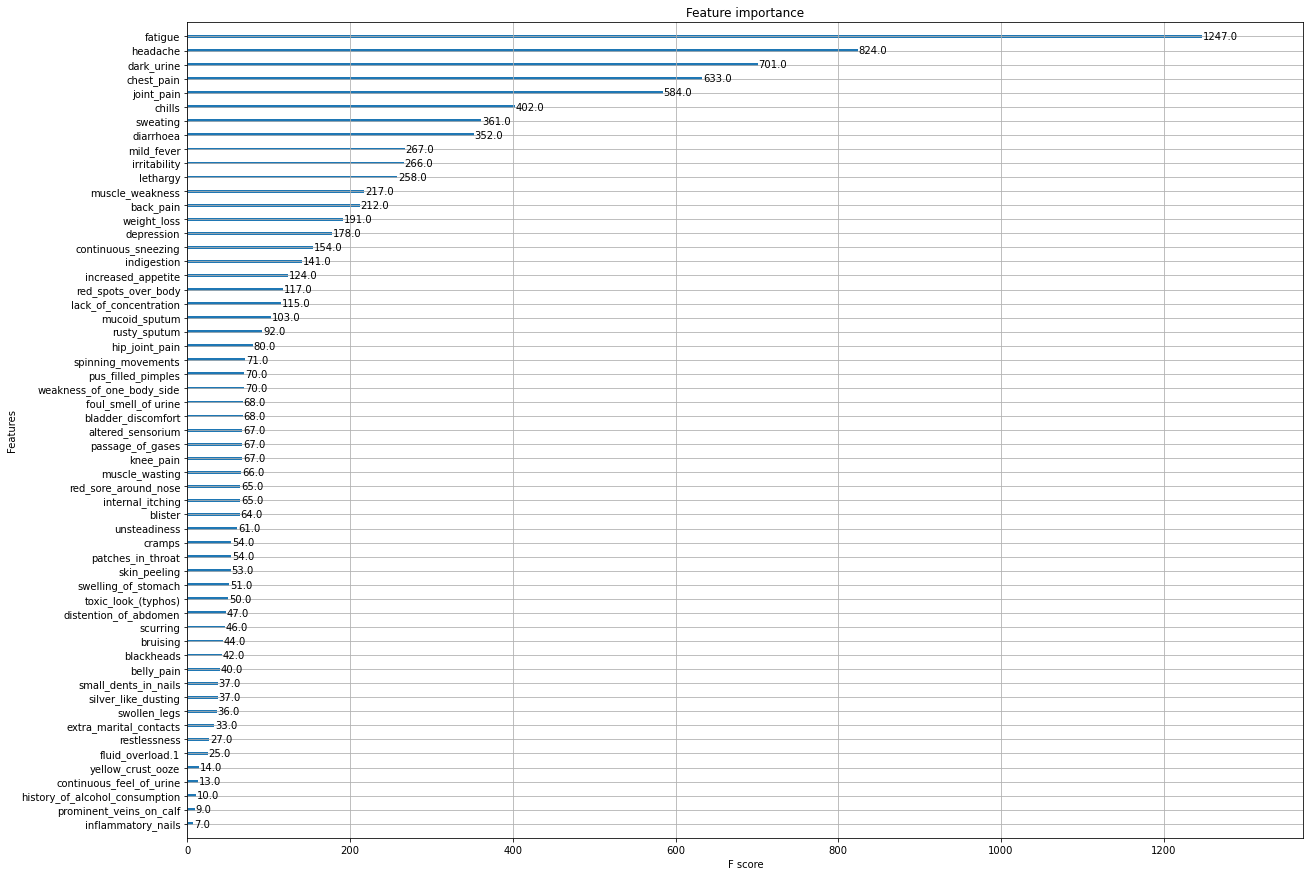

In [53]:
ax = xgb.plot_importance(xg_model)
fig = ax.figure
fig.set_size_inches(20, 15)
fig.show()

##### Plot the ROC curve for multi-class disease classification

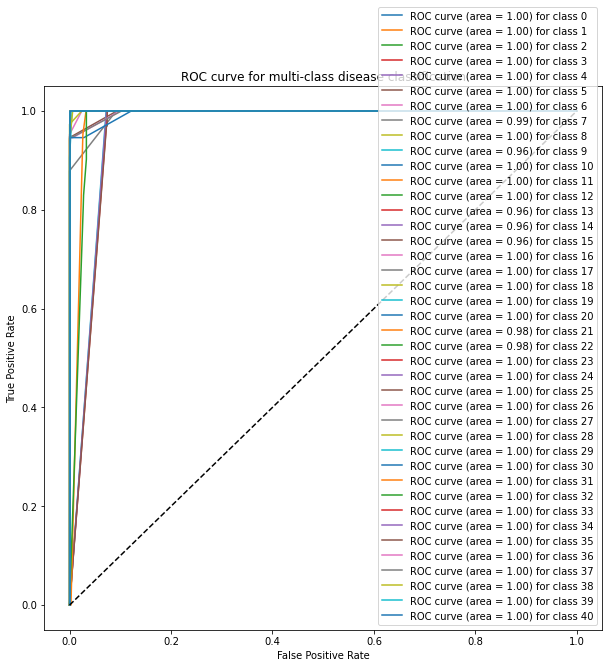

In [54]:
num_classes = 41

# Test the model
y_prob = xg_model.predict_proba(x_test_select)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(41):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10,10))
for i in range(41):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))

# Plot the random line
plt.plot([0, 1], [0, 1], 'k--')

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multi-class disease classification')
plt.legend(loc="lower right")
plt.show()

##### Plot the precision-recall curve XGBoost

Precision represents the percentage of true positives out of all predicted positives, while recall represents the percentage of true positives out of all actual positives. The PR curve is typically used to determine the optimal threshold for classification, where the model has the highest F1 score, which is the harmonic mean of precision and recall.

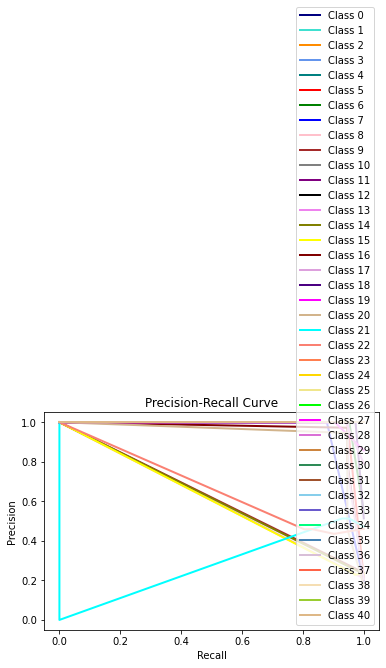

In [55]:
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=np.arange(41))

# Compute the precision-recall curve for each class
precision = dict()
recall = dict()
for i in range(41):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])

# Plot the precision-recall curve for each class
plt.figure()
colors = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'green', 'blue', 'pink', 'brown', 'gray', 'purple', 'black', 'violet', 'olive', 'yellow', 'maroon', 'plum', 'indigo', 'fuchsia', 'tan', 'aqua', 'salmon', 'coral', 'gold', 'khaki', 'lime', 'magenta', 'orchid', 'peru', 'seagreen', 'sienna', 'skyblue', 'slateblue', 'springgreen', 'steelblue', 'thistle', 'tomato', 'wheat', 'yellowgreen', 'burlywood']
for i, color in zip(range(42), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label='Class {0}'.format(i))
    
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.title("Precision-Recall Curve")
plt.show()


### Support Vector Machine Classifier

In [56]:
# linear kernel

svm_model=svm.SVC(kernel='linear', C=1)
svm_model.fit(x_train_select,y_train)       

y_pred_svm=svm_model.predict(x_test_select) 

In [57]:
svm_model.support_vectors_ 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
cm=confusion_matrix(y_test,y_pred_svm)
cm

array([[29,  0,  0, ...,  0,  0,  0],
       [ 0, 44,  0, ...,  0,  0,  0],
       [ 0,  0, 39, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 38,  0,  0],
       [ 0,  0,  0, ...,  0, 37,  0],
       [ 0,  0,  0, ...,  0,  0, 38]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      0.95      0.97        37
           6       1.00      0.95      0.98        42
           7       1.00      0.88      0.94        33
           8       1.00      1.00      1.00        33
           9       0.00      0.00      0.00        33
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        32
          13       0.21      1.00      0.35        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        33
          16       0.97      0.95      0.96        37
          17       1.00    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [60]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
accuracy_svm

0.8885157824042982

In [61]:
#kernel polynomial

svm_model_poly = svm.SVC(kernel='poly', degree=3)                                            
svm_model_poly.fit(x_train_select,y_train)       
y_pred_svmp=svm_model_poly.predict(x_test_select)  

In [62]:
svm_model_poly.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
cm=confusion_matrix(y_test,y_pred_svmp)
print(cm)
accuracy=accuracy_score(y_test,y_pred_svmp)
print(accuracy)

[[29  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 38]]
0.8784419073203492


In [64]:
print(classification_report(y_test, y_pred_svmp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        42
           4       1.00      0.88      0.94        34
           5       1.00      0.95      0.97        37
           6       1.00      0.86      0.92        42
           7       1.00      0.88      0.94        33
           8       1.00      1.00      1.00        33
           9       0.00      0.00      0.00        33
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        32
          13       0.19      1.00      0.32        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        33
          16       0.97      0.95      0.96        37
          17       1.00    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [65]:
#kernel rbf

svm_model_rb=svm.SVC(C=10,kernel='rbf', gamma=0.01)                                           
svm_model_rb.fit(x_train_select,y_train)       
y_pred_rb=svm_model_rb.predict(x_test_select)

In [66]:
cm=confusion_matrix(y_test,y_pred_rb)
print(cm)
accuracy=accuracy_score(y_test,y_pred_rb)
print(accuracy)

[[29  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 39 ...  0  0  0]
 ...
 [ 0  0  0 ... 38  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 38]]
0.8878441907320349


In [67]:
print(classification_report(y_test, y_pred_rb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        34
           5       1.00      0.95      0.97        37
           6       1.00      0.95      0.98        42
           7       1.00      0.88      0.94        33
           8       1.00      1.00      1.00        33
           9       0.00      0.00      0.00        33
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        40
          12       1.00      1.00      1.00        32
          13       0.21      1.00      0.34        29
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        33
          16       0.97      0.95      0.96        37
          17       1.00    

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### Performance Comparison

In [99]:
results = [{'Classifier': 'Random Forest', 'Accuracy': accuracy_rfc},{'Classifier': 'Decision Tree', 'Accuracy': accuracy_dt},
           {'Classifier': 'XGBoost', 'Accuracy': accuracy_xgb}, {'Classifier': 'SVM', 'Accuracy': accuracy_svm}]
df_results = pd.DataFrame(results)

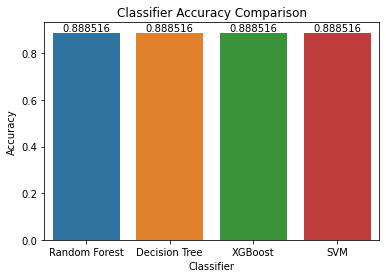

In [100]:
# Plot the accuracy scores of the classifiers
lb = sns.barplot(x='Classifier', y='Accuracy', data=df_results)
lb.bar_label(lb.containers[0] )
plt.title('Classifier Accuracy Comparison')
plt.show()

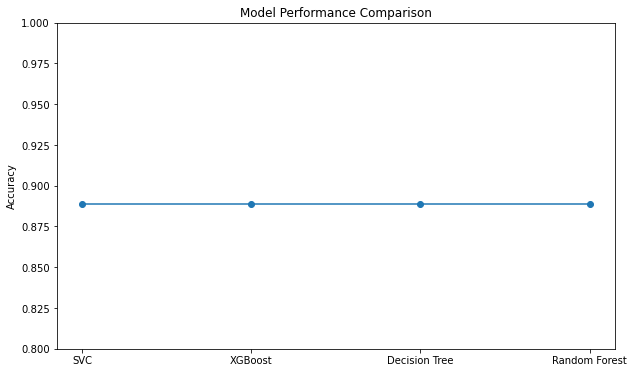

In [101]:
# Line plot accuracy of each model
plt.figure(figsize=(10,6))
plt.plot(['SVC', 'XGBoost', 'Decision Tree', 'Random Forest'],
         [accuracy_svm, accuracy_xgb, accuracy_dt, accuracy_rfc],
         marker='o')
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

##### From the above plots it can be inferred that due to the dataset being sparse we are getting almost similar or not much of difference as to how the four different models or techniques perform to predict the disease 